# Examples on how to run the MPSE module

In [1]:
import numpy as np
from scipy.spatial import distance_matrix

import mview

You can run the MPSE algorithm on multiple data types.

To begin, suppose that you have three dissimilarity/distance square matrices D1, D2, and D3, containing the pairwise dissimilarity/distances for a set of nodes.

For this example, suppose that we have 32 nodes. We assign a 3D position to each node, then project the positions to 2D coordinates using 3 different perspectives (the standard projections) and compute the distance matrices from these projections.

In [2]:
N = 32 #number of points
X = np.random.randn(N,3) #positions in 3D
Y1 = X[:,[1,2]] #projection of data into 2D, viewed from x-direction
Y2 = X[:,[2,0]]
Y3 = X[:,[0,1]]
D1 = distance_matrix(Y1,Y1) #pairwise distance matrix of Y1
D2 = distance_matrix(Y2,Y2)
D3 = distance_matrix(Y3,Y3)

To run MPSE, assuming that the true projections (the standard projections) are known, we can run:

In [3]:
Xf,Qf,cost,H = mview.MPSE([D1,D2,D3],Q='standard')

Here, Xf is the final embedding (an array of size N by 3), Qf is the list of projections (three 2x3 matrices, in this case the same as the original, since only X was being solved for), cost is the final (normalized) MPSE MDS cost, and H is a dictionary containing computation history (cost, step sizes, learning rates, gradient size, time of computation, etc.).

For this example, since the MPSE of X can be realized exactly, the algorithm succeded in finding the optimal (exact) minima if the final cost is close to zero (much smaller than 1e-2 for these parameters). If the final cost is not that small, then the algorithm found some local minimum, but not the global (exact) minimum.

The final normalized MPSE MDS cost is: 0.029938647897083732
The final projection parameters are:
[[1. 0. 0.]
 [0. 1. 0.]]
[[1. 0. 0.]
 [0. 0. 1.]]
[[0. 1. 0.]
 [0. 0. 1.]]


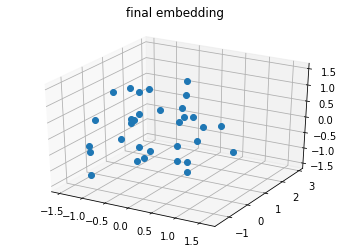

In [4]:
print('The final normalized MPSE MDS cost is:',cost)
print('The final projection parameters are:')
print(Qf[0])
print(Qf[1])
print(Qf[2])
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot(Xf[:,0],Xf[:,1],Xf[:,2],'o')
ax.title.set_text('final embedding')
plt.show()

Let us run the same algorithm with some extra arguments, which return feedback on how the algorithm ran and produces plots of the results. The results may be different from above, as the initial embedding will be different. The 3D plots don't work in jupyter (you only get an image of the 3D plot.

mpse.MPSE():
  mds.MDS(perspective # 1):
    dissimilarity stats:
      number of points : 32
      number of edges : 496
      dissimilarity rms : 2.45e+00
      normalization factor : 1.22e+03
    embedding stats:
      dimension : 2
  mds.MDS(perspective # 2):
    dissimilarity stats:
      number of points : 32
      number of edges : 496
      dissimilarity rms : 2.14e+00
      normalization factor : 1.06e+03
    embedding stats:
      dimension : 2
  mds.MDS(perspective # 3):
    dissimilarity stats:
      number of points : 32
      number of edges : 496
      dissimilarity rms : 2.51e+00
      normalization factor : 1.24e+03
    embedding stats:
      dimension : 2
  MPSE.initialize():
    X0 : random
    Q0 : given
  dissimilarity stats:
    number of views : 3
    number of points : 32
  embedding stats:
    embedding dimension : 3
    projection dimension : 2
  MPSE.gd():
    mpse method : fixed projections
    initial stress : 8.87e-02
- gd.single(): 
  computation paramete

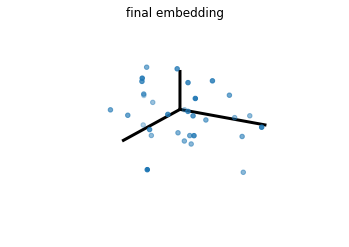

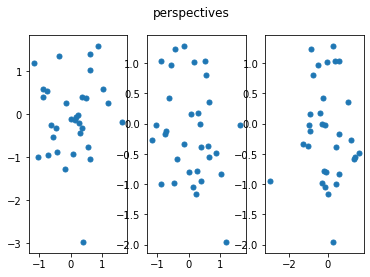

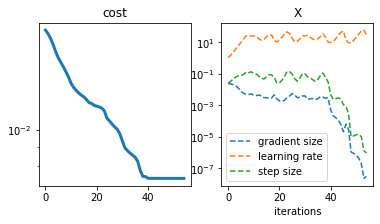

In [5]:
Xf,Qf,cost,H = mview.MPSE([D1,D2,D3],Q='standard',verbose=1,plot=True)

The first plot is the 3D plot of the final embedding. The second plot is the 2D plots of each of the projected final positions. The third plot contains the computation history.

Now, to run MPSE without fixed projections, simply do not specify the optional variable Q. In such case, a random initial value for the projectiosn will be assigned and the algorithm will simultaneously search for the optimal embedding and projection parameters.

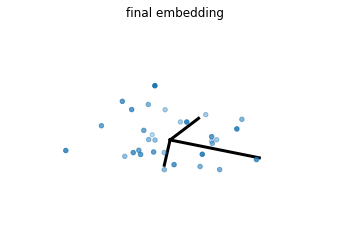

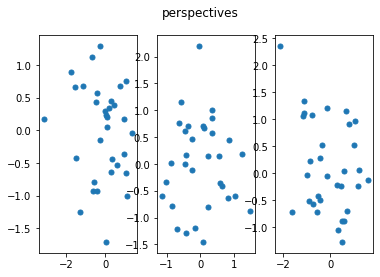

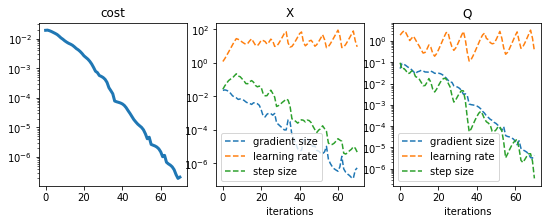

In [6]:
X,Q,cost,H = mview.MPSE([D1,D2,D3],plot=True)

The function mview.MPSE undestands other formats for the set of pairwise distance/dissimilarity relations. For example, instead of specifying the entire distances/dissimilarity square matrices (which takes a long time to compute for large number of points), you can just specify positions/features of each component and let mview.MPSE compute whichever distances it needs on the fly (using Euclidean distance by default). Note that this will take longer in our example, since we're computing the full gradient at each step, but this will be faster (and require much less memory) for larger data sets (and using a stochastic scheme).

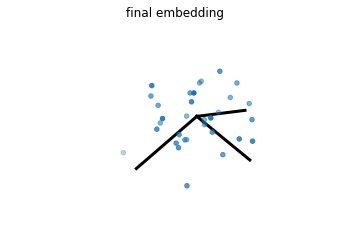

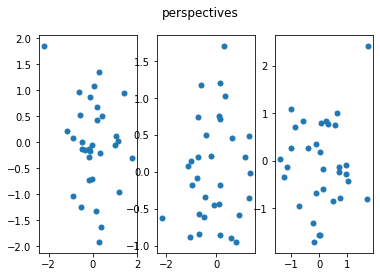

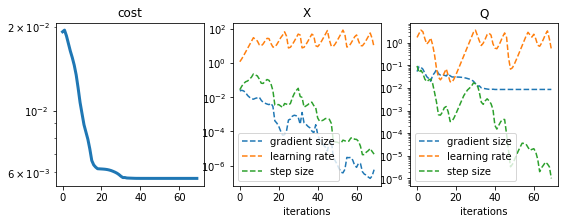

In [7]:
Xf,Qf,cost,H = mview.MPSE([Y1,Y2,Y3],plot=True)

Now, to accelerate convergence for large data examples, we approximate the gradient and cost at each iteration using only a fraction of the pairwise dissiilarities/distances. You can specify this using the keyword 'stochastic'. If this is a number between 0 and 1, then it represents the proportion of edges being used. If it is an integer, then it represents the average number of edges per node.

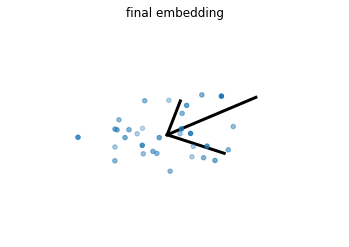

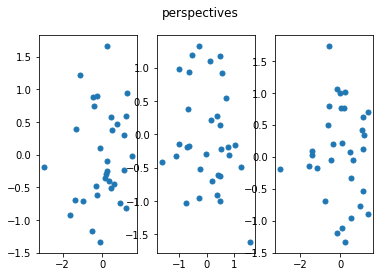

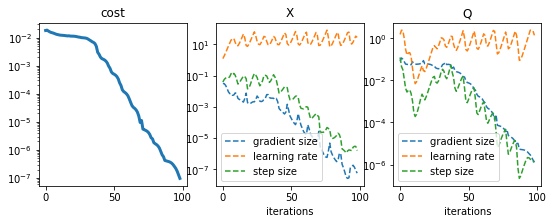

In [8]:
Xf,Qf,cost,H = mview.MPSE([Y1,Y2,Y3],edge_proportion=0.50,smart_initialize=True,
                          plot=True)

If we repeat the experiment for N=1000 points, a full GD scheme would take hours, but this can be made much faster by using the stochastic scheme.

mpse.MPSE():
  mds.MDS(perspective # 1):
    dissimilarity stats:
      number of points : 100
      number of edges : 4950
      dissimilarity rms : 1.95e+00
      normalization factor : 9.65e+03
    embedding stats:
      dimension : 2
  mds.MDS(perspective # 2):
    dissimilarity stats:
      number of points : 100
      number of edges : 4950
      dissimilarity rms : 1.94e+00
      normalization factor : 9.62e+03
    embedding stats:
      dimension : 2
  mds.MDS(perspective # 3):
    dissimilarity stats:
      number of points : 100
      number of edges : 4950
      dissimilarity rms : 1.99e+00
      normalization factor : 9.83e+03
    embedding stats:
      dimension : 2
  MPSE.initialize():
    X0 : random
    Q0 : random
  dissimilarity stats:
    number of views : 3
    number of points : 100
  embedding stats:
    embedding dimension : 3
    projection dimension : 2
  MPSE.smart_initialize():
mds.MDS():
  dissimilarity stats:
    number of points : 100
    number of edges :

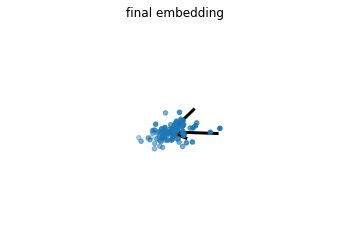

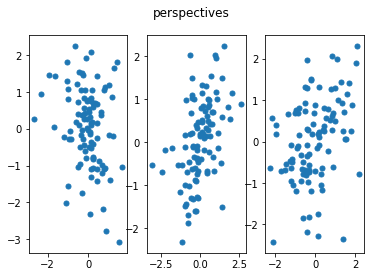

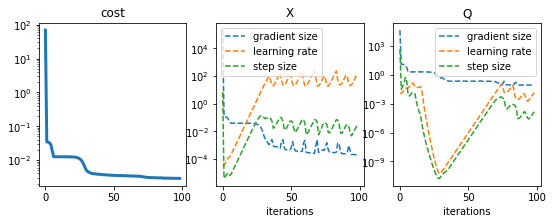

In [9]:
N = 100 #number of points
X = np.random.randn(N,3) #positions in 3D
Y1 = X[:,[1,2]] #projection of data into 2D, viewed from x-direction
Y2 = X[:,[2,0]]
Y3 = X[:,[0,1]]
Xf,Qf,cost,H = mview.MPSE([Y1,Y2,Y3],edge_proportion=.01,smart_initialize=True,
                          verbose=2,plot=True,lr=100)
#here the 128 means that 128 edges per node are used on average
#(as opposed to 1000 per node)

# Generating perspectives from projections

In order to generate distance/dissimilarity relations from projections of a set of coordinates, we can use the projections.py file in mview.

In [10]:
N = 32 #number of points
X = np.random.randn(N,3) #generate random coordinates in 3D

K = 4 #number of projections
proj = mview.projections.PROJ() #object containing rules of projection family
Q = proj.generate(number=K) #generates projections in the set family
Y = proj.project(Q,X)# projects the data points

By default, proj is the set of orthogonal projections from 3D to 2D. Q is a list containing randomly generated projection parameters from this family.

In [11]:
for i in range(K):
    print(f'Q[{i}] = \n {Q[i]}')

Q[0] = 
 [[-0.52363049  0.6835617  -0.50848255]
 [-0.676556    0.02908948  0.73581641]]
Q[1] = 
 [[-0.9692517   0.1550646  -0.19106573]
 [ 0.13160655 -0.32941456 -0.93496832]]
Q[2] = 
 [[ 0.70341001  0.38337097  0.59853242]
 [ 0.11309432 -0.89171169  0.43824644]]
Q[3] = 
 [[ 0.35370636 -0.06349661 -0.9331988 ]
 [-0.31261654 -0.94834537 -0.0539625 ]]


These are 2x3 orthogonal matrices, randomly sampled (Haar/uniform measure) over the set of 2x3 orthogonal matrices.

Now, Y is the list of projected data points (one for each projection).

In [12]:
print('The lenght of Y is :',len(Y))
print('The shape of the arrays is :',Y[0].shape)

The lenght of Y is : 4
The shape of the arrays is : (32, 2)


We can now run MPSE as before, with or without fixed projections.

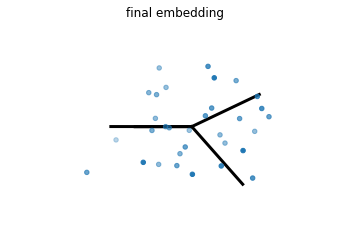

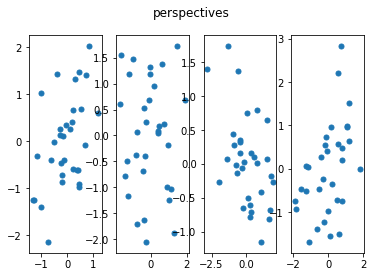

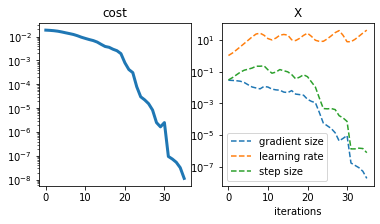

In [13]:
Xf,Qf,cost,H = mview.MPSE(Y,Q=Q,edge_proportion=.95,max_iter=300,plot=True) #here we use fixed projections,
#by giving MPSE the correct projection parameters

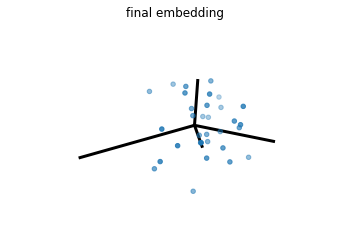

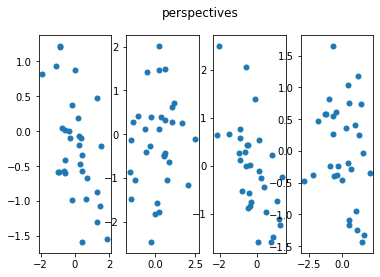

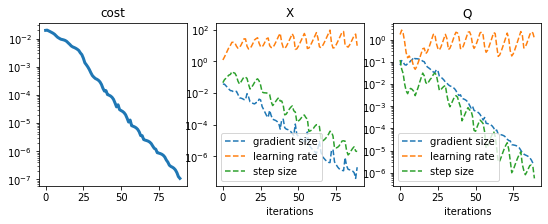

In [14]:
Xf,Qf,cost,H = mview.MPSE(Y,edge_proportion=.9,max_iter=300,plot=True) #here we do not specify the projections
#so MPSE must find those too